# Fuel Efficiency End-to-End Project

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

import sklearn
import pickle
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# check the GPU
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
# get the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset.txt', na_values = '?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
df.shape

(398, 9)

### EDA

In [8]:
# check information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [9]:
# check for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [10]:
# if there are few values short, drop those rows
df.dropna(inplace = True)

In [11]:
# check if the null values are still available
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [12]:
# describe the dataframe
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
# get the names of all the types of cars in the ddataset
df['car name'].unique()

array(['chevrolet chevelle malibu ', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 20

In [14]:
# drop the car name column
df.drop(['car name'], axis =1, inplace = True)

In [15]:
# seperate dataset into x and target feature
X = df.drop("mpg", axis = 1)
y = df['mpg']

In [16]:
# split the x and y into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# standardise the datasets for train and test sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [19]:
# save the standard scaler 
pickle.dump(sc, open(r'/content/drive/MyDrive/scaler.pkl','wb'))

In [20]:
# chckk the keys needed for X matrix of features
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [21]:
len(X_train.keys())

7

### Initialize ANN

In [22]:
model = Sequential()

# input layer and first hidden layer
model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X_train.keys())]))
# second hidden layer
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
# output layer 
model.add(Dense(units = 1))

In [29]:
# Compile the ANN
model.compile(loss = 'mean_squared_error',
             optimizer = 'Adam',
             metrics = ['mean_squared_error', 'mean_absolute_error'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [31]:
# train the ann model
model_history = model.fit(X_train_sc, y_train, batch_size = 100, epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 3s 8ms/step - loss: 625.2499 - mean_squared_error: 625.2499 - mean_absolute_error: 23.7114
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 608.8937 - mean_squared_error: 608.8937 - mean_absolute_error: 23.3640
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 593.0851 - mean_squared_error: 593.0851 - mean_absolute_error: 23.0240
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 573.6082 - mean_squared_error: 573.6082 - mean_absolute_error: 22.6012
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 546.7468 - mean_squared_error: 546.7468 - mean_absolute_error: 22.0059
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 508.8068 - mean_squared_error: 508.8068 - mean_absolute_error: 21.1380
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 454.6116 - mean_squared_error: 454.6116 - mean_absolute_error: 19.8514

In [32]:
# save the model
model.save(r"/content/drive/MyDrive/fuel_model.h5")

### Model Evaluation


In [34]:
prediction=model.predict(X_test_sc)

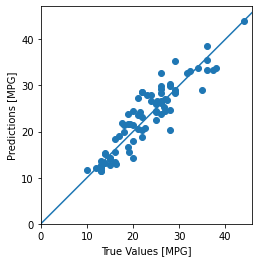

In [35]:
# lets plot the figure of predictions vs real values
plt.scatter(y_test, prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [38]:
# check the metrics
rmse=np.sqrt(mean_squared_error(y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(y_test,prediction))

RMSE:  2.9689803920334383
R_square: 0.8272973385344435


### Prediction

In [39]:
input_data_1=[[4,97,100,5000,14.5,70,3]]
input_data_1=sc.transform(input_data_1)
input_data_1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.87318372, -0.95093563, -0.12019762,  2.39807246, -0.37111846,
        -1.71277533,  1.79195851]])

In [40]:
y_pred_1 = model.predict(input_data_1)

In [41]:
y_pred_1

array([[29.14622]], dtype=float32)

In [42]:
input_data_2=[[8,307,130,3504,12,70,1]]
input_data_2=sc.transform(input_data_2)
input_data_2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.48290683,  1.07607822,  0.66468113,  0.61667308, -1.25973593,
        -1.71277533, -0.68982474]])

In [43]:
y_pred_2 = model.predict(input_data_2)

In [44]:
y_pred_2

array([[19.89487]], dtype=float32)